# Objective

Histogram equalization

In [67]:
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Colors separation and reconstruction

## (a) Use an existing library to separate the three channels of your RGB image and show each of them separately.

In [68]:
from numpy import ndarray, uint8

def separate_and_display(imageName: str):
    """Display the R,G,B channels of an image"""
    image = cv2.imread(f'./in/{imageName}') 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    r,g,b = cv2.split(image)

    fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(15,9))
    fig.suptitle(f'Image {imageName} separated into three channels', fontweight='bold')

    ax1[0].set_axis_off()
    ax1[2].set_axis_off()

    ax1[1].imshow(image, cmap='gray')
    ax1[1].set_title('Original image')
    ax1[1].set_axis_off()

    ax2[0].imshow(r, cmap='Reds', vmin=0, vmax=255)
    ax2[0].set_title('Red channel')

    ax2[1].imshow(g, cmap='Greens', vmin=0, vmax=255)
    ax2[1].set_title('Green channel')

    ax2[2].imshow(b, cmap='Blues', vmin=0, vmax=255)
    ax2[2].set_title('Blue channel')

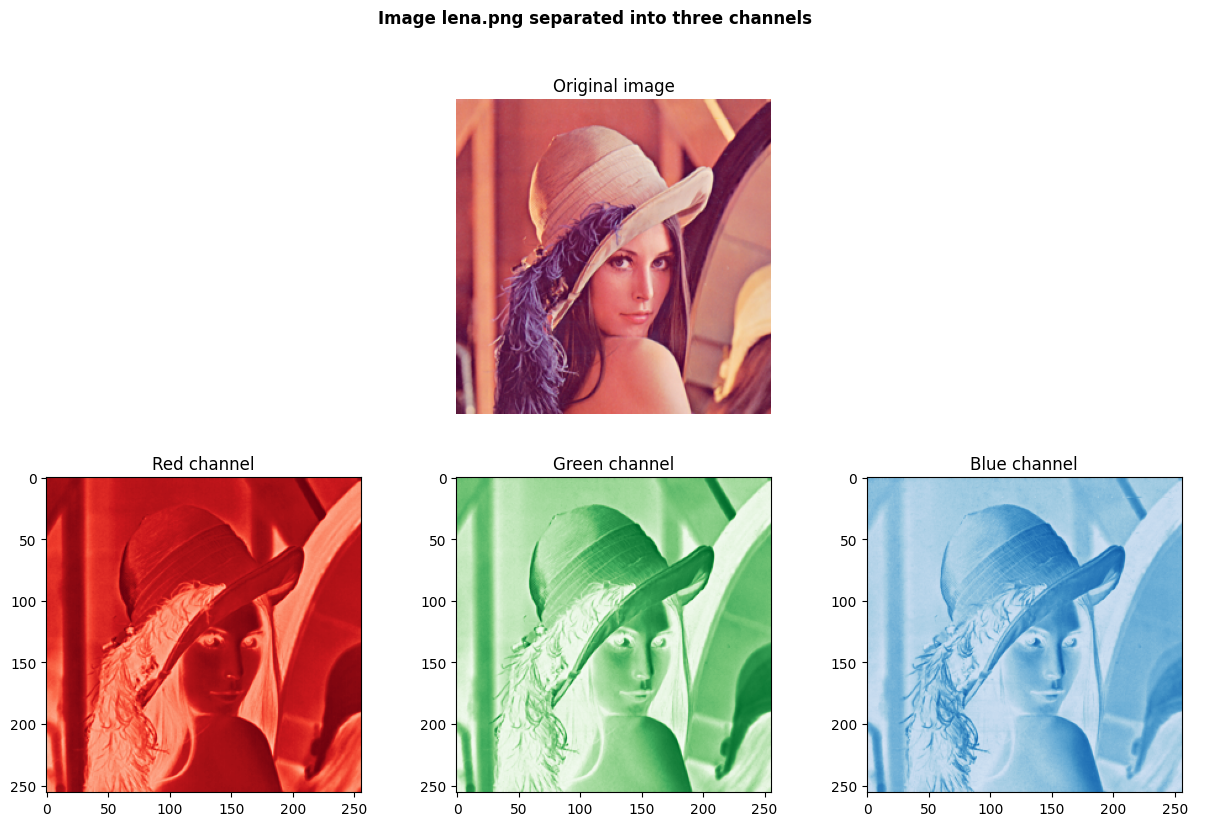

In [69]:
separate_and_display('lena.png')

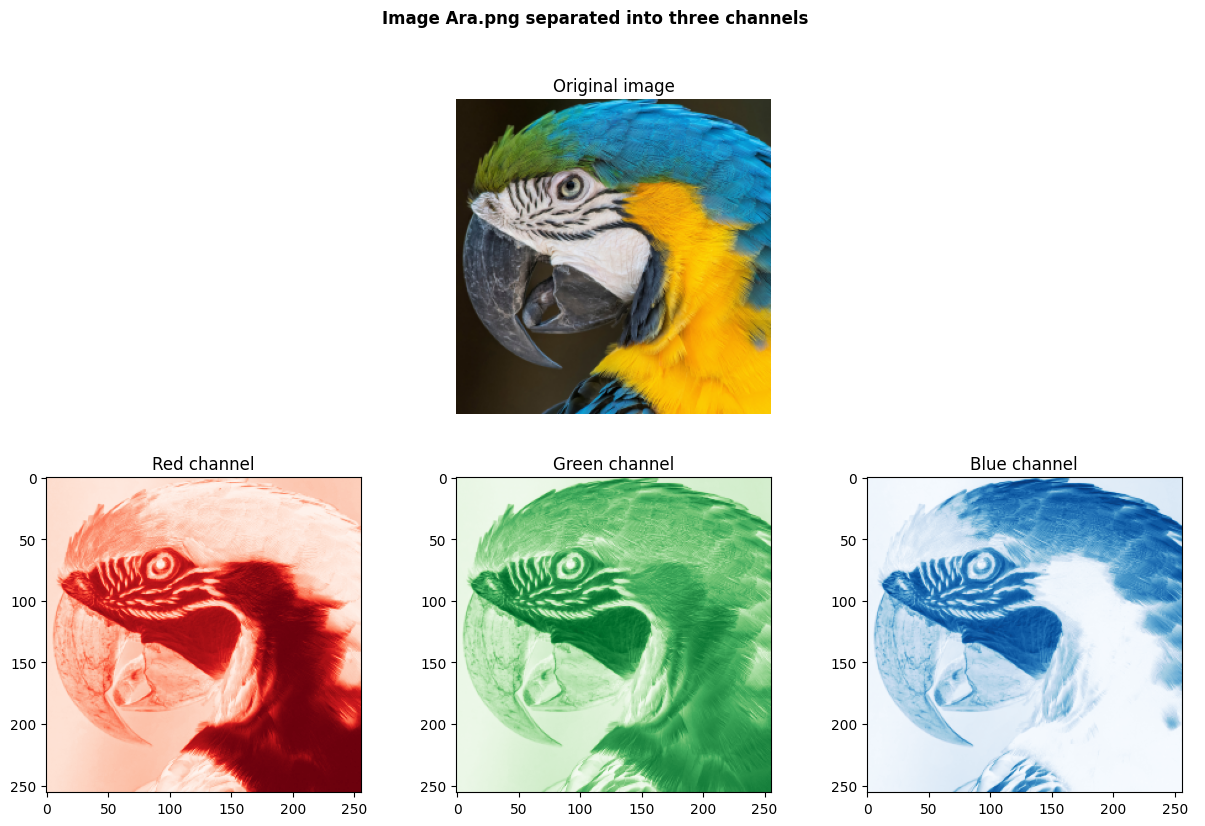

In [70]:
separate_and_display('Ara.png')

## (b) Write your own algorithm to separate an RGB image into the three channels of the HSL color space (H, S, L)

In [71]:
from cv2 import Mat

def image_rgb_to_hsl(image: Mat):
    """Display the R,G,B channels of an image"""

    shape = image.shape
    hslImage = np.zeros(shape, dtype=np.float32)
    (x,y,z) = shape
    for i in range(x):
        for j in range(y):
            hslImage[i,j] = pixel_rgb_to_hsl(*image[i,j])

    return hslImage

def pixel_rgb_to_hsl(r: int, g: int, b: int):
    """Transform a RGB pixel into a HSL one given the HSL values"""
    #Calculate meta-values
    r = r/255
    g = g/255
    b = b/255

    rgb = [r,g,b]

    Cmax = np.max(rgb)
    Cmin = np.min(rgb)
    delta = Cmax - Cmin

    #Calculate H
    if delta == 0:
        h = 0
    elif Cmax == r:
        h = 60.0 * (((g-b)/delta) % 6)
    elif Cmax == g:
        h = 60.0 * (((b-r)/delta) + 2.0)
    else:
        h = 60.0 * (((r-g)/delta) + 4.0)
    #Round as H is a degree value
    h = int(np.rint(h))

    #Calculate L
    l = (Cmax + Cmin) / 2
    l = np.round(l, 2)

    #Calculate S
    s = 0 if delta == 0 else (delta/(1-np.abs(2*l-1)))
    s = np.round(s, 2)

    return (h, s, l)

In [72]:
for r,g,b in ([0,0,0], [200,100,50], [100,200,50], [50,100,200], [255,255,255]):
    h,s,l = pixel_rgb_to_hsl(r,g,b)
    print(f"RGB({r},{g},{b}) = hsl({h},{s},{l})")

RGB(0,0,0) = hsl(0,0,0.0)
RGB(200,100,50) = hsl(20,0.6,0.49)
RGB(100,200,50) = hsl(100,0.6,0.49)
RGB(50,100,200) = hsl(220,0.6,0.49)
RGB(255,255,255) = hsl(0,0,1.0)


# c) Write your own algorithm to reconstruct an RGB image from the H, S, L channels.

In [73]:
from cv2 import Mat

def image_hsl_to_rgb(image: Mat):
    """Display the R,G,B channels of an image"""
    shape = image.shape
    rgbImage = np.zeros(shape, dtype=np.uint8)
    (x,y,z) = shape
    for i in range(x):
        for j in range(y):
            rgbImage[i,j] = pixel_hsl_to_rgb(*image[i,j])

    return rgbImage

def pixel_hsl_to_rgb(h: float, s: float, l: float):
    """Transform a RGB pixel into a HSL one given the HSL values"""
    #Calculate meta-values
    c = (1 - np.abs(2*l - 1)) * s

    hInd = h / 60

    x = c * (1 - np.abs((hInd % 2) - 1))

    m = l - c/2

    #Big switch let's go
    if 0<=h<60:
        (r,g,b) = (c, x, 0)
    elif 60<=h<120:
        (r,g,b) = (x, c, 0)
    elif 120<=h<180:
        (r,g,b) = (0, c, x)
    elif 180<=h<240:
        (r,g,b) = (0, x, c)
    elif 240<=h<300:
        (r,g,b) = (x, 0, c)
    elif 300<=h<=360:
        (r,g,b) = (c, 0, x)

    return (uint8(np.rint(255*(r+m))), uint8(np.rint(255*(g+m))), uint8(np.rint(255*(b+m))))

# Display the results compared to Numpy's results

In [74]:
for r,g,b in ([0,0,0], [200,100,50], [100,200,50], [50,100,200], [255,255,255]):
    h,s,l = pixel_rgb_to_hsl(r,g,b)
    r2, g2, b2 = pixel_hsl_to_rgb(h, s, l)
    print(f"RGB({r},{g},{b}) ->  hsl({h},{s},{l}) -> RGB({r2},{g2},{b2}) ")

RGB(0,0,0) ->  hsl(0,0,0.0) -> RGB(0,0,0) 
RGB(200,100,50) ->  hsl(20,0.6,0.49) -> RGB(200,100,50) 
RGB(100,200,50) ->  hsl(100,0.6,0.49) -> RGB(100,200,50) 
RGB(50,100,200) ->  hsl(220,0.6,0.49) -> RGB(50,100,200) 
RGB(255,255,255) ->  hsl(0,0,1.0) -> RGB(255,255,255) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


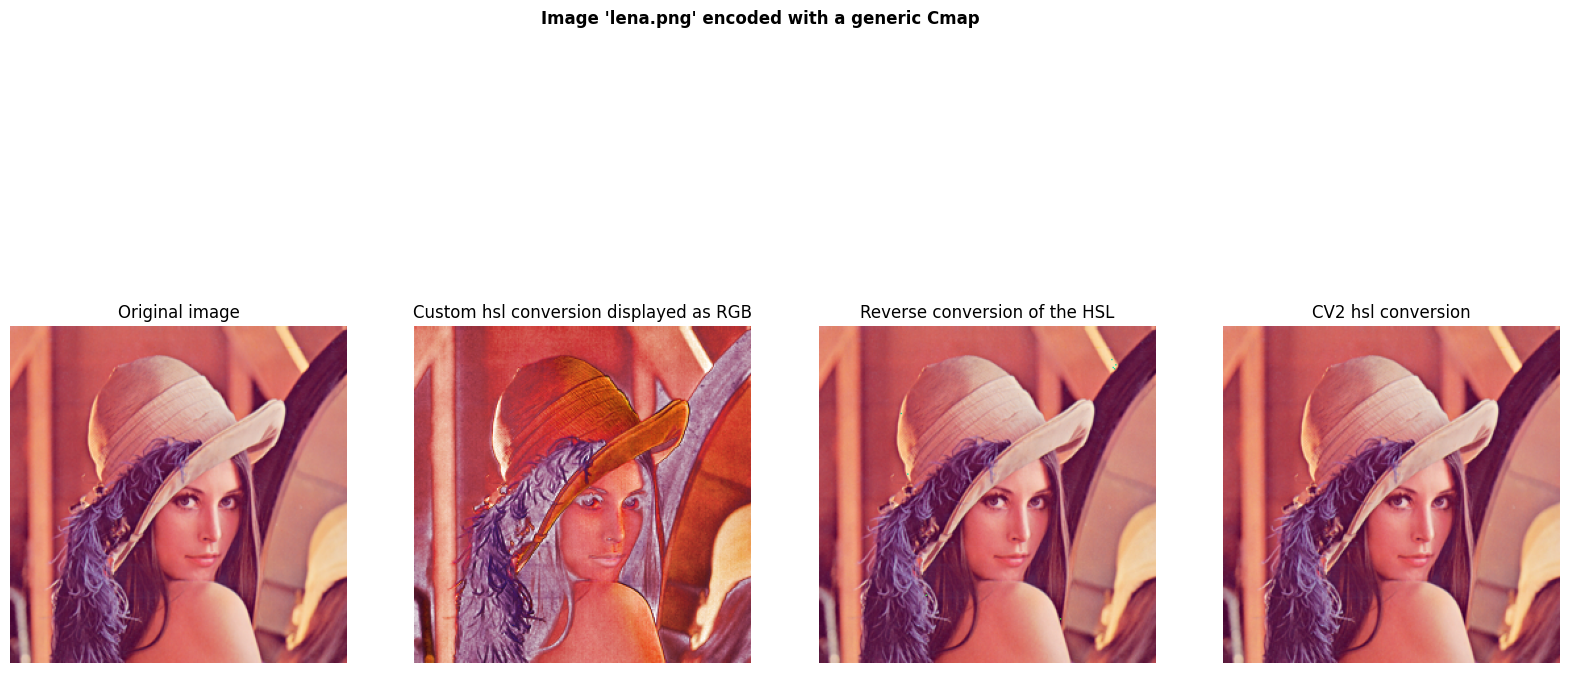

In [75]:
imageName = "lena.png"
image = cv2.cvtColor(cv2.imread(f'./in/{imageName}'), cv2.COLOR_BGR2RGB)

hslImage = image_rgb_to_hsl(image)
hslReverseImage = image_hsl_to_rgb(hslImage)
cv2hslImage = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

#Display first image and color image, as well as Cmap
fig, axes = plt.subplots(1, 4, figsize=(20, 10)) 
fig.suptitle(f"Image 'lena.png' encoded with a generic Cmap", fontweight='bold')

axes[0].imshow(image)
axes[0].set_title('Original image')
axes[0].set_axis_off()

axes[1].imshow(cv2.cvtColor(hslImage, cv2.COLOR_HLS2RGB))
axes[1].set_title('Custom hsl conversion displayed as RGB')
axes[1].set_axis_off()

axes[2].imshow(hslReverseImage)
axes[2].set_title('Reverse conversion of the HSL')
axes[2].set_axis_off()

axes[3].imshow(cv2.cvtColor(cv2hslImage, cv2.COLOR_HLS2RGB))
axes[3].set_title('CV2 hsl conversion')
axes[3].set_axis_off()

# 2. Greyscale Histogram Equalization

## (a) Write your own histogram equalization algorithm based on the method presented in the lecture.

In [76]:
from typing import Callable

from numpy import dtype, uint16, uint32


N = 256

def real(pix_intensity: int) -> float:
    """ Domain transfer for a pixel intensity, from integers (discrete) to float (continuous). Assume 256 colors space. """
    return (1+2*pix_intensity)/(2*N)

def quant(pix_intensity: float) -> int:
    """ Domain transfer for a pixel intensity, from float (continuous) to integers (discrete). Assume 256 colors space. """
    return np.floor(N * pix_intensity)

def map_to_im(image: Mat, func: Callable, datatype: dtype = None) -> Mat:
    """ Apply given function to all pixels of the image. Can force a new dtype on new matrix, default to input image dtype """
    resultImage = np.zeros(image.shape, dtype=(datatype or image.dtype))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            resultImage[i,j] = func(image[i,j])
    return resultImage

def histogram_2d(image: Mat, max_intensity: int) -> ndarray:
    """Return the histogram of an image as an Ndarray
    
    Returns
    -----
        ndarray - The histogram with the intensity as index and the count as value. Hist is between [0;max_intensity]
    """
    hist = np.zeros(max_intensity, dtype=uint32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    return hist

def cumulative_histogram_2d(histogram: ndarray) -> ndarray:
    cumulative_hist = np.zeros(histogram.shape, dtype=histogram.dtype)
    cumulative_value = 0
    for i,value in enumerate(histogram):
        cumulative_value += value
        cumulative_hist[i] = cumulative_value
    return cumulative_hist

def equalize_image(image: Mat):
    """Equalize the histogram of an image. Returns the resulting equalized image. """
    image_size = image.shape[0] * image.shape[1]
    hist = histogram_2d(image, 256)
    cumulative_hists = cumulative_histogram_2d(hist)

    resulting_image = np.zeros(image.shape, dtype=uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            target_intensity = image[i,j]
            normalized_cumulative_intensity_index = cumulative_hists[target_intensity] / image_size
            resulting_image[i,j] = quant(normalized_cumulative_intensity_index)
    return resulting_image

def show_hist(histogram: ndarray, title: str) -> None:
    plt.plot(histogram)
    plt.ylim([0, 1.10*max(histogram)])
    plt.xlim([0,256])
    plt.title(title)
    plt.show()

## (b) Apply your algorithm on the greyscale images provided on ILIAS.

* First: Build the histogram of our image to have an idea of the intensity distribution

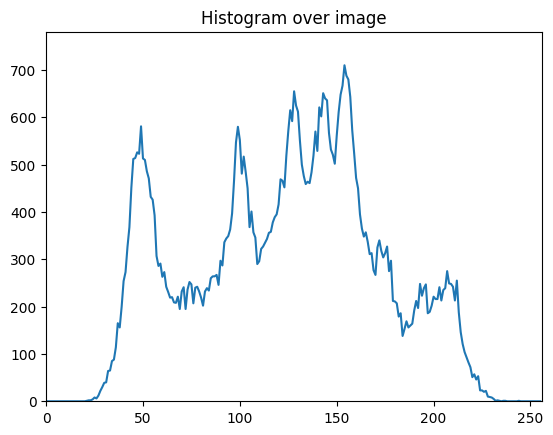

In [77]:
image_name = "Lena-grey.png"
image = cv2.imread(f'./in/{image_name}', cv2.IMREAD_GRAYSCALE)

real_image = map_to_im(image, real, np.float32)

pixel_count = image.shape[0] * image.shape[1]

histogram = histogram_2d(image, N)

show_hist(histogram, "Histogram over image")

* Second: Build the cumulative hist in order to see the curve that we'll equalize

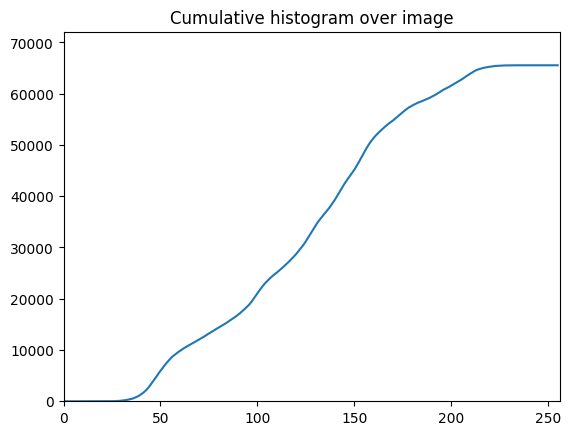

In [78]:
cumulative_hist = cumulative_histogram_2d(histogram)
show_hist(cumulative_hist, "Cumulative histogram over image")

* Third: Build the resulting image and display both

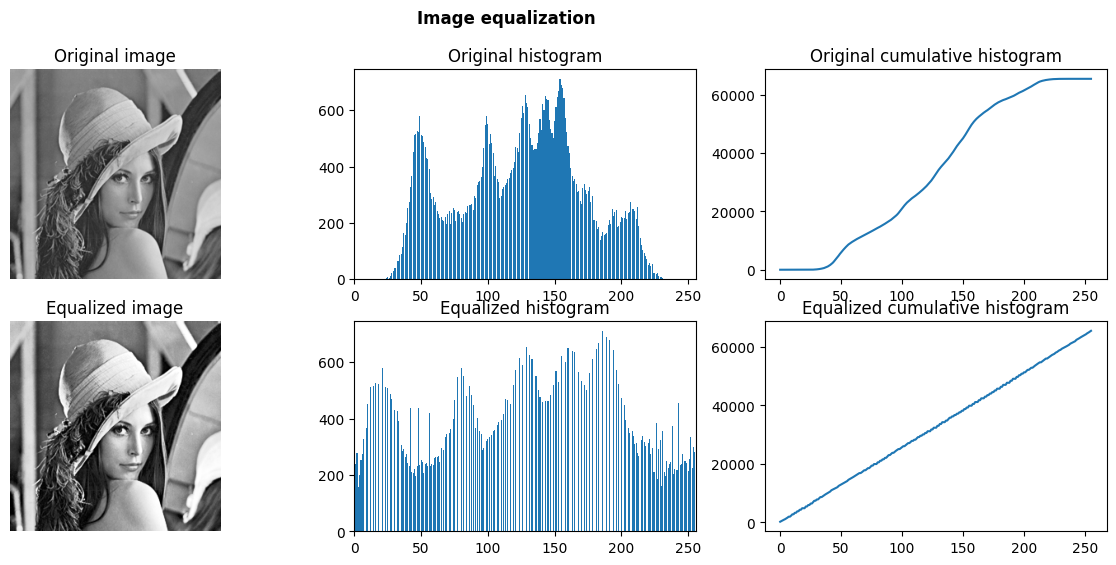

In [79]:
def equalize_and_display(image: Mat, save: bool = False):
    equalized_image = equalize_image(image)

    fig, axes = plt.subplots(2, 3, figsize=(15, 6))
    fig.suptitle(f'Image equalization', fontweight='bold')

    axes[0][0].imshow(image, cmap='gray', vmin=0, vmax=255)
    axes[0][0].set_title('Original image')
    axes[0][0].set_axis_off()

    hist1 = histogram_2d(image, 256)
    axes[0][1].bar(range(256), hist1)
    axes[0][1].set_xlim(0,256)
    axes[0][1].set_title('Original histogram')

    axes[0][2].plot(cumulative_histogram_2d(hist1))
    axes[0][2].set_title('Original cumulative histogram')

    axes[1][0].imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
    axes[1][0].set_title('Equalized image')
    axes[1][0].set_axis_off()

    hist2 = histogram_2d(equalized_image, 256)
    axes[1][1].bar(range(256), hist2)
    axes[1][1].set_xlim(0,256)
    axes[1][1].set_title('Equalized histogram')

    axes[1][2].plot(cumulative_histogram_2d(hist2))
    axes[1][2].set_title('Equalized cumulative histogram')

equalize_and_display(image)

Wee see that the black / white holes in the original histogram picture (meaning those ranges were not usesd much) are now filled in the equalized histogram. The cumulative histogram is a very good line with a slope of 1.

Test on a few others images

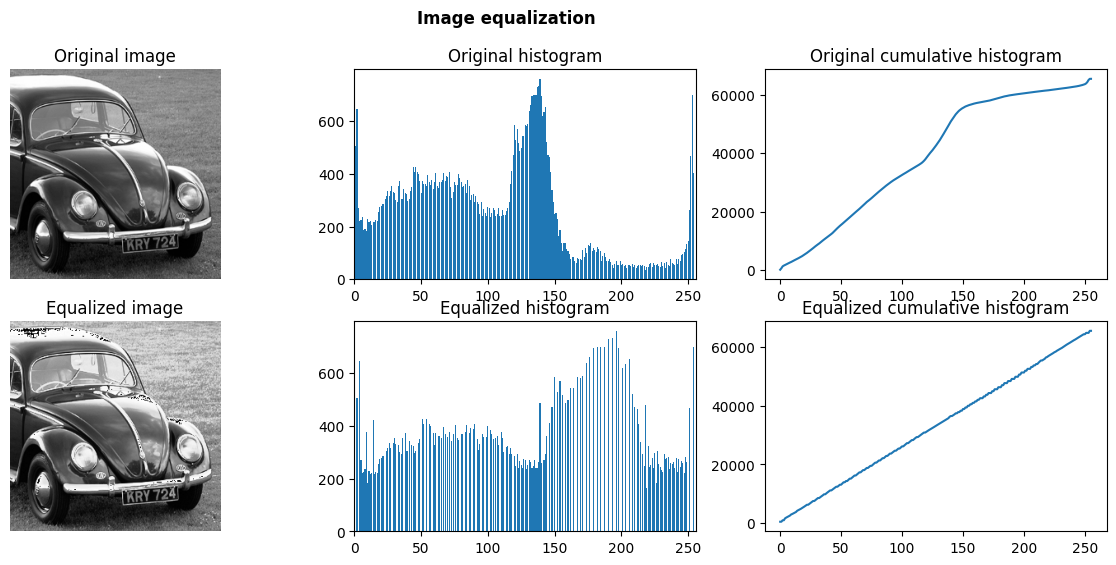

In [80]:
image_name = "Beetle"
image = cv2.imread(f'./in/{image_name}-grey.png', cv2.IMREAD_GRAYSCALE)
equalize_and_display(image)

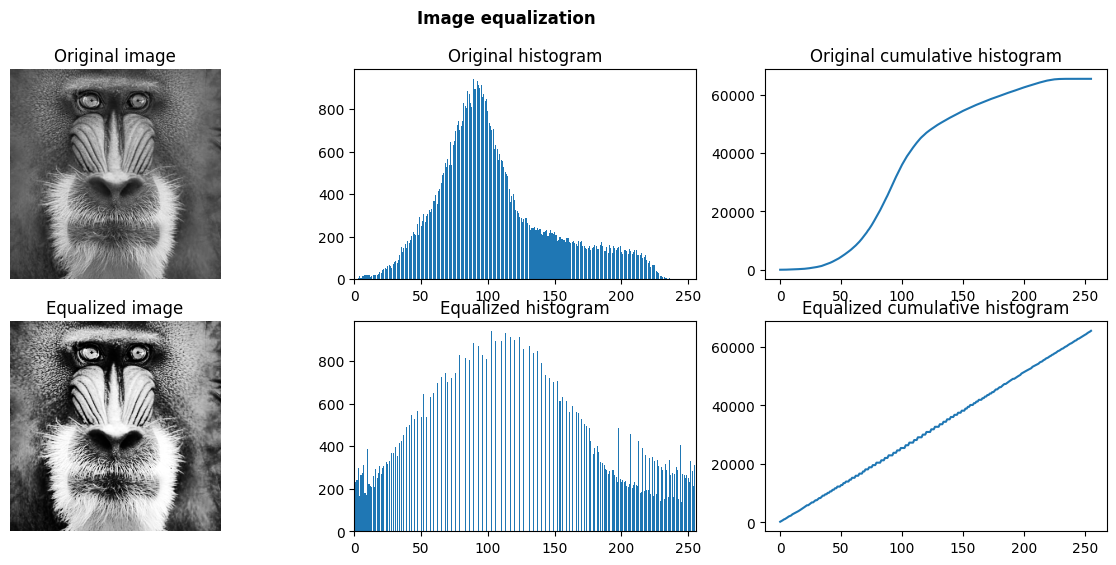

In [81]:
image_name = "Baboon"
image = cv2.imread(f'./in/{image_name}-grey.png', cv2.IMREAD_GRAYSCALE)
equalize_and_display(image)

# 3. Color Histogram Equalization
## (a) Firstly, apply your histogram equalization algorithm on the R, G, and B channels and reconstruct your image.

In [82]:
def equalize_image_3d(image:Mat, save: bool = False):
    r,g,b = cv2.split(image)

    equalized_r = equalize_image(r)
    equalized_g = equalize_image(g)
    equalized_b= equalize_image(b)

    equalizedImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalizedImage[i,j] = (equalized_r[i,j], equalized_g[i,j], equalized_b[i,j])
    return equalizedImage

Text(0.5, 1.0, 'Final equalized histograms')

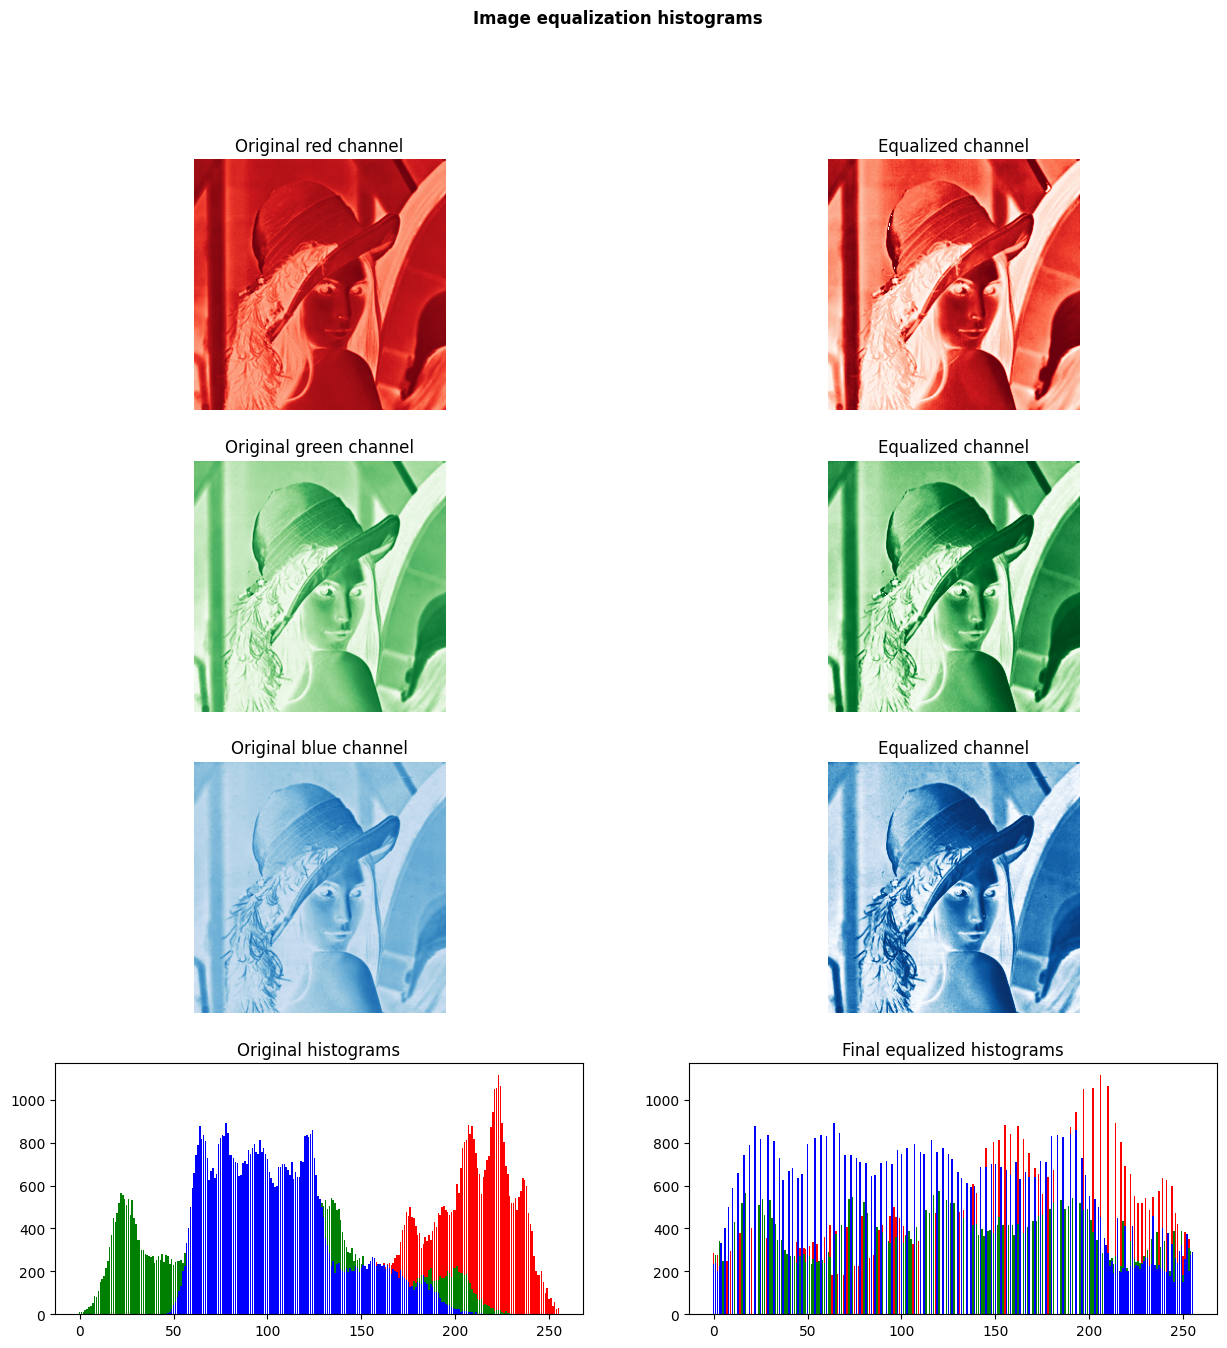

In [83]:
image_name = "Lena"
image = cv2.imread(f'./in/{image_name}.png') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(image)
equalized_image = equalize_image_3d(image)

fig, axes = plt.subplots(4,2, figsize=(15, 15))
fig.suptitle(f'Image equalization histograms', fontweight='bold')

#Populate each channel as a row
eq_histograms = []
for (i, (chann, chann_cmap)) in enumerate([(r, 'Reds'), (g, 'Greens'), (b, 'Blues')]):
    axes[i][0].imshow(chann, cmap=chann_cmap, vmin=0, vmax=255)
    axes[i][0].set_title(f"Original {chann_cmap.lower().removesuffix('s')} channel")
    axes[i][0].set_axis_off()

    equalized_chann = equalize_image(chann)
    axes[i][1].imshow(equalized_chann, cmap=chann_cmap, vmin=0, vmax=255)
    axes[i][1].set_title('Equalized channel')
    axes[i][1].set_axis_off()

    eq_histograms.append(histogram_2d(equalized_chann, 256))    

#Last lines: Display  histogram
axes[3][0].bar(range(256), histogram_2d(r, 256), color="r")
axes[3][0].bar(range(256), histogram_2d(g, 256), color="g")
axes[3][0].bar(range(256), histogram_2d(b, 256), color="b")
axes[3][0].set_title(f"Original histograms")

axes[3][1].bar(range(256), eq_histograms[0], color="r")
axes[3][1].bar(range(256), eq_histograms[1], color="g")
axes[3][1].bar(range(256), eq_histograms[2], color="b")
axes[3][1].set_title(f"Final equalized histograms")

We remark that going with the RGB and plotting the 3 histograms, the 3 channels are correctly equalized. Although this is correct on a greyscale image, RGB encoding might not really separable - Maybe treating each component separately is a mistake that will greatly affect the image ?

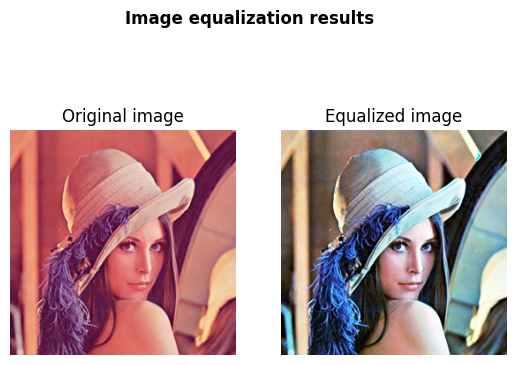

In [84]:
fig, axes = plt.subplots(1,2)
fig.suptitle(f'Image equalization results', fontweight='bold')

axes[0].imshow(image)
axes[0].set_title(f"Original image")
axes[0].set_axis_off()

axes[1].imshow(equalized_image)
axes[1].set_title(f"Equalized image")
axes[1].set_axis_off()

## (b) Secondly, apply the histogram equalization on the L channel of your HSL image and reconstruct your image with the new L channel and the original H and S channels. Convert the result on an RGB image.

In [85]:
hsl_image = image_rgb_to_hsl(image)

h,s,l = cv2.split(hslImage)

#Put l on 256 values in order to work with the histograms the same way, don't forget to re-map it into its domain at the end
l = map_to_im(l, quant, uint8)

equalized_l = equalize_image(l)

#Put l on 256 values in order to work with the histograms the same way, don't forget to re-map it into its domain at the end
equalized_l = map_to_im(equalized_l, real, np.float32)

hsl_equalized = np.zeros_like(hsl_image)
for i in range(hslImage.shape[0]):
    for j in range(hslImage.shape[1]):
        hsl_equalized[i,j] = (h[i,j], s[i,j], equalized_l[i,j])

hsl_equalized_reverse = image_hsl_to_rgb(hsl_equalized)

## (c) Visually compare the result of the two images after equalizing the histograms (RGB and HSL). What can you observe?

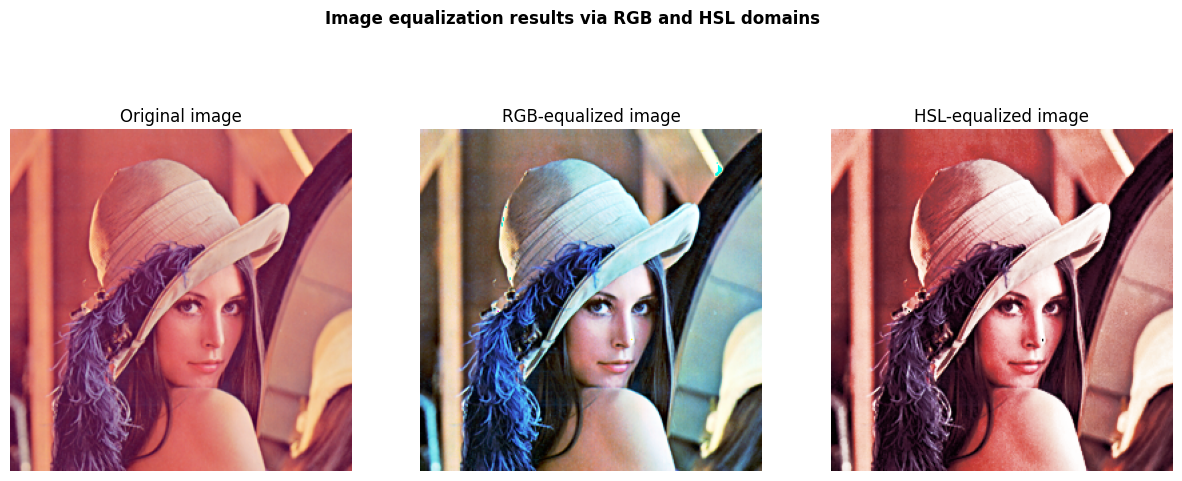

In [86]:
fig, axes = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle(f'Image equalization results via RGB and HSL domains', fontweight='bold')

axes[0].imshow(image)
axes[0].set_title(f"Original image")
axes[0].set_axis_off()

axes[1].imshow(equalized_image)
axes[1].set_title(f"RGB-equalized image")
axes[1].set_axis_off()

axes[2].imshow(hsl_equalized_reverse)
axes[2].set_title(f"HSL-equalized image")
axes[2].set_axis_off()

The HSL-encoded image preserve the general aspect of the image way better while still having the equalization effect (Using the whole channel). Let's look at the comparative histogram of the resulting RGB/HSL rgb images:

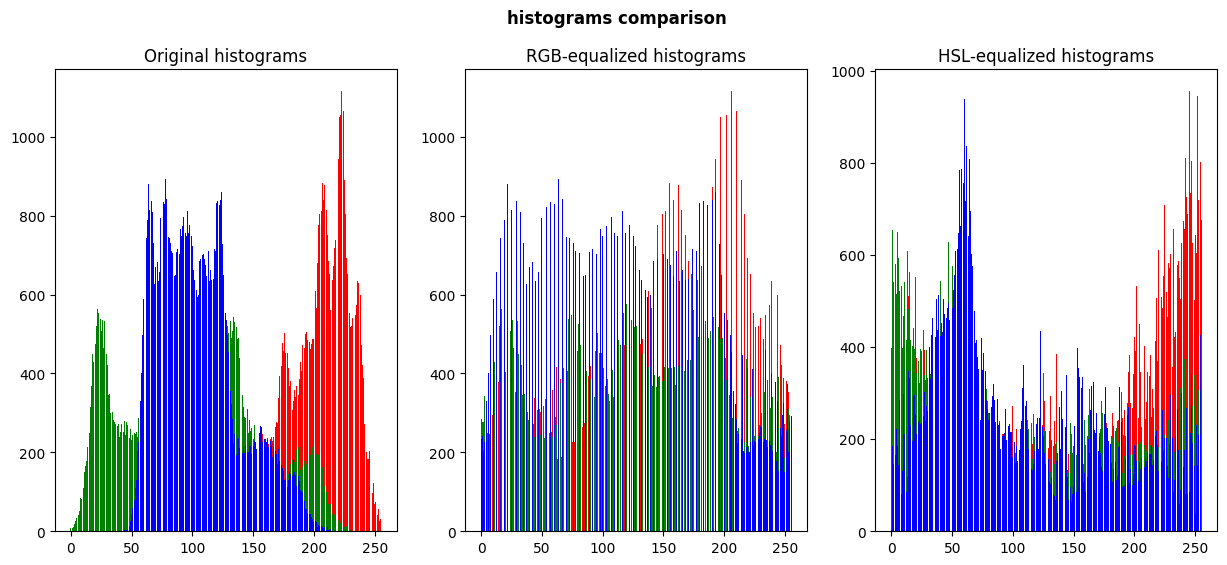

In [87]:
fig, axes = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle(f'histograms comparison', fontweight='bold')

r,g,b = cv2.split(image)
#Last lines: Display  histogram
axes[0].bar(range(256), histogram_2d(r, 256), color="r")
axes[0].bar(range(256), histogram_2d(g, 256), color="g")
axes[0].bar(range(256), histogram_2d(b, 256), color="b")
axes[0].set_title(f"Original histograms")

r,g,b = cv2.split(equalized_image)
#Last lines: Display  histogram
axes[1].bar(range(256), histogram_2d(r, 256), color="r")
axes[1].bar(range(256), histogram_2d(g, 256), color="g")
axes[1].bar(range(256), histogram_2d(b, 256), color="b")
axes[1].set_title(f"RGB-equalized histograms")

r,g,b = cv2.split(hsl_equalized_reverse)
axes[2].bar(range(256), histogram_2d(r, 256), color="r")
axes[2].bar(range(256), histogram_2d(g, 256), color="g")
axes[2].bar(range(256), histogram_2d(b, 256), color="b")
axes[2].set_title(f"HSL-equalized histograms")

Even though the whole domain is utilized in both cases and each channel is spread more evenly, the RGB equalization has treated the component separately - resulting in a widening of the 3 channels, and a loss of their respective proportionnality. With the HSL separation, as the L channel encodes the 3 colors in itself, there is a more consistent equalization of the histogram that conserves image's features such as its dominant color (red for Lena).